# Import Module

In [1]:
import pickle
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
dates = range(19,30)

In [2]:
with open('./filtered_daily/df_topic_sent_tweets_filtered_subset_1_6hrs.pickle', 'rb') as handle:
    df_topic_sent = pickle.load(handle)
with open('./filtered_daily/df_topic_sent_news_filtered_subset_1_6hrs.pickle', 'rb') as handle:
    df_topic_sent_news = pickle.load(handle)

In [3]:
df_topic_sent_news

TopicID     0     1      2  timeSpan           startTime   total  \
0          1   118    84   14.0         0  2020-0319 00:00:00   216.0   
1          2    17    30    1.0         0  2020-0319 00:00:00    48.0   
2          3  4531  1336  181.0         0  2020-0319 00:00:00  6048.0   
3          4   174    69    4.0         0  2020-0319 00:00:00   247.0   
4          5   610    54   48.0         0  2020-0319 00:00:00   712.0   
..       ...   ...   ...    ...       ...                 ...     ...   
875       16    12     7    0.0        43  2020-0329 18:00:00    19.0   
876       17   404   113   12.0        43  2020-0329 18:00:00   529.0   
877       18     3     2    0.0        43  2020-0329 18:00:00     5.0   
878       19   141    14    5.0        43  2020-0329 18:00:00   160.0   
879       20    29    10    8.0        43  2020-0329 18:00:00    47.0   

     TopicScore  
0     -0.481481  
1     -0.333333  
2     -0.719246  
3     -0.688259  
4     -0.789326  
..          ...  
875   -0.631579  
876   -0.741021  
877   -0.600000  
878   -0.850000  
879   -0.446809  

[880 rows x 8 columns]

In [4]:
timespan = df_topic_sent_news.startTime.unique()
timespan

array(['2020-0319 00:00:00', '2020-0319 06:00:00', '2020-0319 12:00:00',
       '2020-0319 18:00:00', '2020-0320 00:00:00', '2020-0320 06:00:00',
       '2020-0320 12:00:00', '2020-0320 18:00:00', '2020-0321 00:00:00',
       '2020-0321 06:00:00', '2020-0321 12:00:00', '2020-0321 18:00:00',
       '2020-0322 00:00:00', '2020-0322 06:00:00', '2020-0322 12:00:00',
       '2020-0322 18:00:00', '2020-0323 00:00:00', '2020-0323 06:00:00',
       '2020-0323 12:00:00', '2020-0323 18:00:00', '2020-0324 00:00:00',
       '2020-0324 06:00:00', '2020-0324 12:00:00', '2020-0324 18:00:00',
       '2020-0325 00:00:00', '2020-0325 06:00:00', '2020-0325 12:00:00',
       '2020-0325 18:00:00', '2020-0326 00:00:00', '2020-0326 06:00:00',
       '2020-0326 12:00:00', '2020-0326 18:00:00', '2020-0327 00:00:00',
       '2020-0327 06:00:00', '2020-0327 12:00:00', '2020-0327 18:00:00',
       '2020-0328 00:00:00', '2020-0328 06:00:00', '2020-0328 12:00:00',
       '2020-0328 18:00:00', '2020-0329 00:00:00', 

In [64]:
df_topic_sent_news.timeSpan.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43])

# Overall Visulization

In [65]:
df_topic_sent.loc[:,[0,1,2]].sum().sum(),df_topic_sent_news.loc[:,[0,1,2]].sum().sum()

(1606507.0, 1180221.0)

Text(0.5,0,'News')

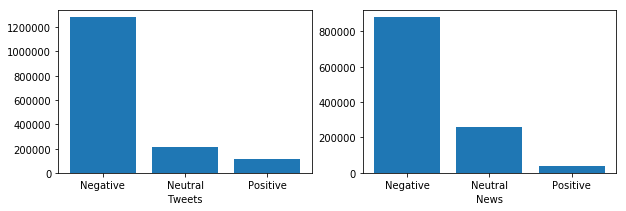

In [66]:
plt.figure(figsize=(10, 3))
plt.subplot('121')
plt.bar(('Negative','Neutral','Positive'),df_topic_sent.loc[:,[0,1,2]].sum())
plt.xlabel('Tweets')
plt.subplot('122')
plt.bar(('Negative','Neutral','Positive'),df_topic_sent_news.loc[:,[0,1,2]].sum())
plt.xlabel('News')

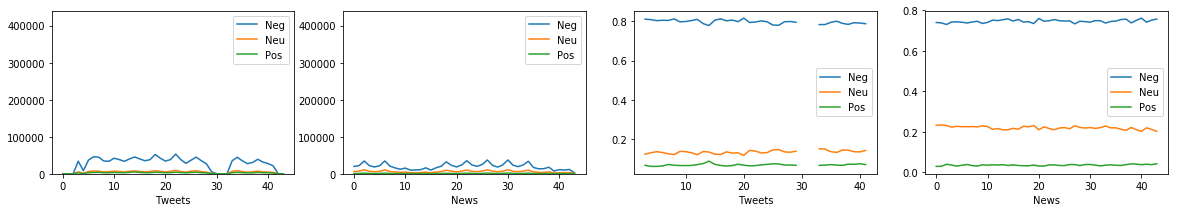

In [68]:
plt.figure(figsize=(20, 3))
plt.subplot('141')
plt.plot(df_topic_sent.groupby('timeSpan').sum().loc[:,[0,1,2]])
plt.ylim(0,440000)
plt.xlabel('Tweets')
plt.legend(['Neg','Neu','Pos'])
plt.subplot('142')
plt.plot(df_topic_sent_news.groupby('timeSpan').sum().loc[:,[0,1,2]])
plt.ylim(0,440000)
plt.xlabel('News')
plt.legend(['Neg','Neu','Pos'])
plt.subplot('143')
day = df_topic_sent.groupby('timeSpan').sum()
plt.plot(day[0]/day['total'])
plt.plot(day[1]/day['total'])
plt.plot(day[2]/day['total'])
plt.xlabel('Tweets')
plt.legend(['Neg','Neu','Pos'])
plt.subplot('144')
day = df_topic_sent_news.groupby('timeSpan').sum()
plt.plot(day[0]/day['total'])
plt.plot(day[1]/day['total'])
plt.plot(day[2]/day['total'])
plt.xlabel('News')
plt.legend(['Neg','Neu','Pos'])

In [69]:
for df in [df_topic_sent,df_topic_sent_news]:
    t = df.loc[:,[0,1,2]].sum()
    print((t[2]-t[0])/(t.sum()))

-0.7280192367664753
-0.7095476186239695


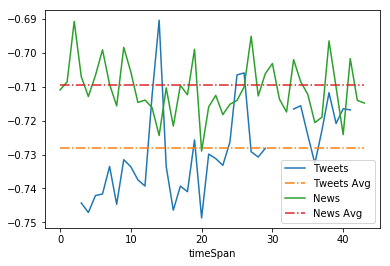

In [70]:
# Overall all sentiment score against each day
tweets_sent = df_topic_sent.groupby('timeSpan').sum()
((tweets_sent[2]-tweets_sent[0])/tweets_sent['total']).plot()
plt.plot(range(44),[-0.7280192367664753 for d in range(44)], linestyle="-." )
news_sent = df_topic_sent_news.groupby('timeSpan').sum()
((news_sent[2]-news_sent[0])/news_sent['total']).plot()
plt.plot(range(44),[-0.7095476186239695 for d in range(44)], linestyle="-." )
plt.legend(['Tweets','Tweets Avg','News','News Avg'])

# Topic Count of each Sentiment

Text(0.5,0,'News')

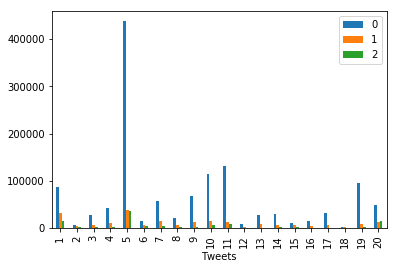

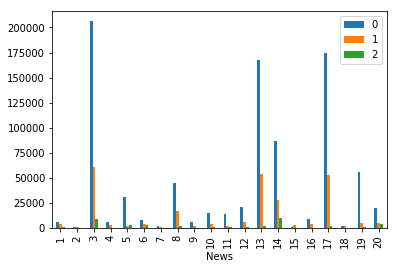

In [71]:
#由于存在无法map topics 和 sent的，所以现在tweets和new数量不一致
plt.figure(figsize=(10, 3))
df_topic_sent.groupby('TopicID').sum().loc[:,[0,1,2]].plot.bar()
plt.xlabel('Tweets')
df_topic_sent_news.groupby('TopicID').sum().loc[:,[0,1,2]].plot.bar()
plt.xlabel('News')

In [72]:
def multi_subplot(w=15,h=12,d='bar',dfs=df_topic_sent):
    plt.figure(1,figsize=(w, h))
    for i in range(3):
        plt.subplot(f'14{i+1}')
        count = dfs.groupby('TopicID')[i].sum()
        if d=='bar':
            count.plot.bar()
        elif d=='pie':
            count.sort_index().plot.pie()
    #     plt.legend(loc='best', shadow=True)
        plt.title('Topics Count when sentiment is '+ str(i))
    plt.subplot(f'144')
    topic_total = dfs.groupby('TopicID').sum()
    ((topic_total[2]-topic_total[0])/topic_total['total']).plot.bar()
#     dfs.groupby('TopicID')['TopicScore'].sum().plot.bar()
    plt.title('Topics Sentiment Scores')

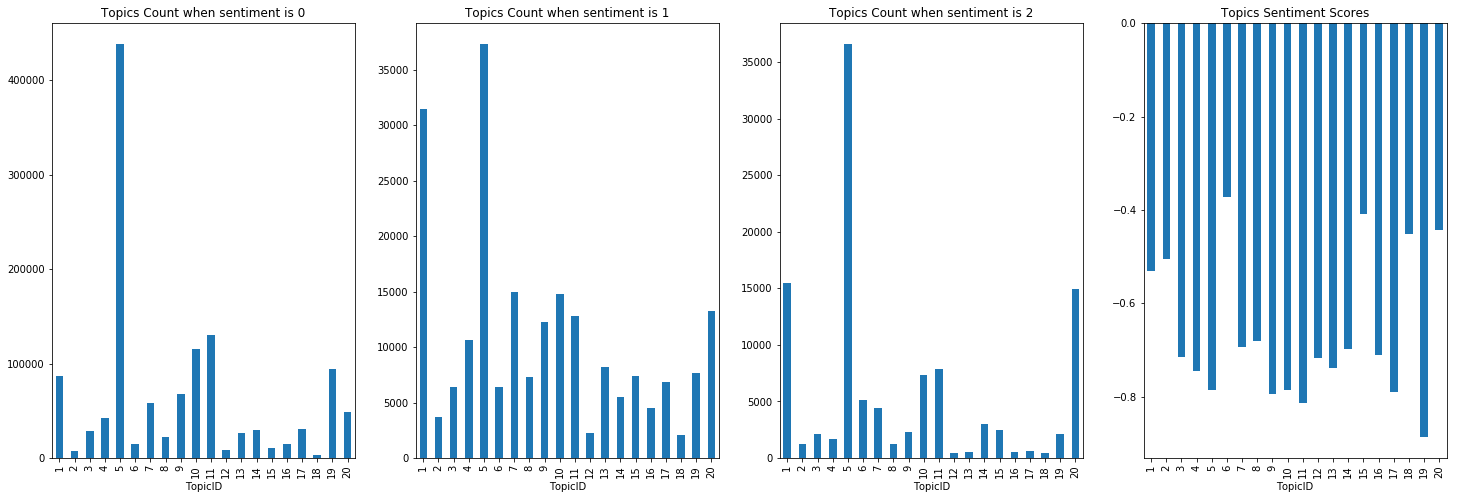

In [73]:
multi_subplot(w=25,h=8,dfs=df_topic_sent)

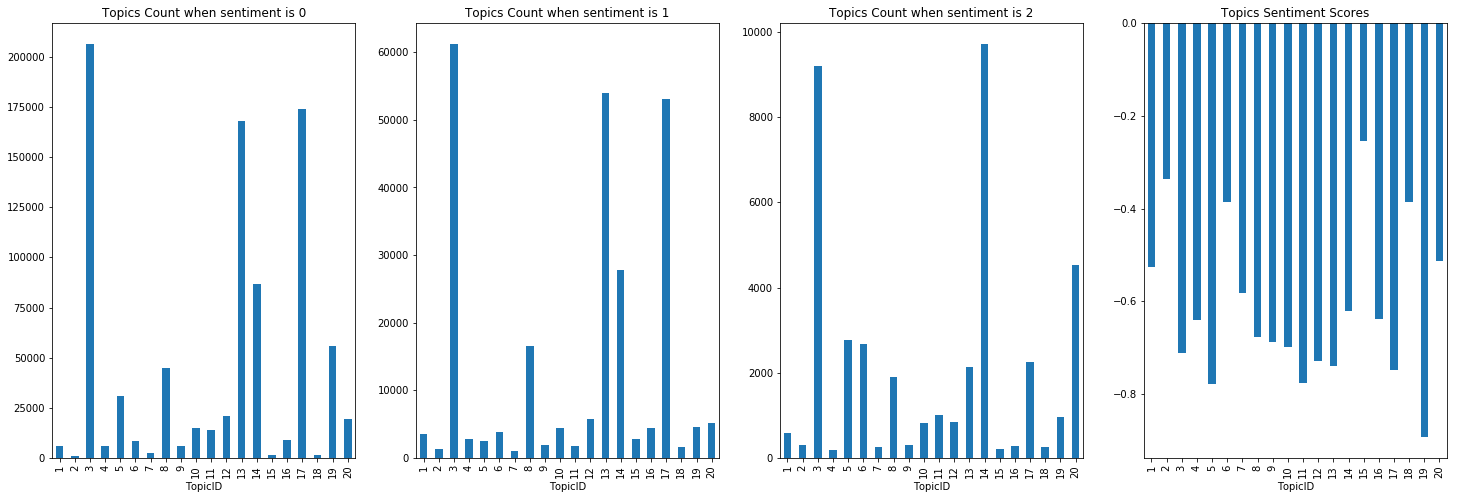

In [74]:
multi_subplot(w=25,h=8,dfs=df_topic_sent_news)

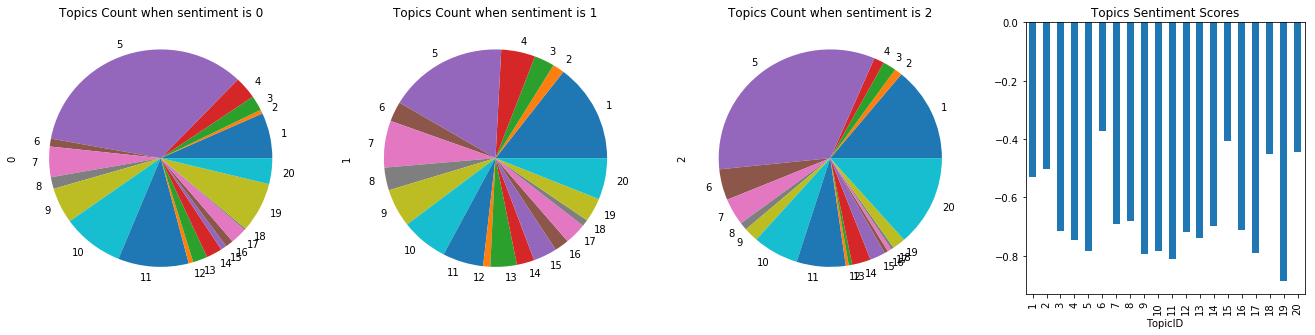

In [75]:
multi_subplot(w=23,h=5,d='pie')

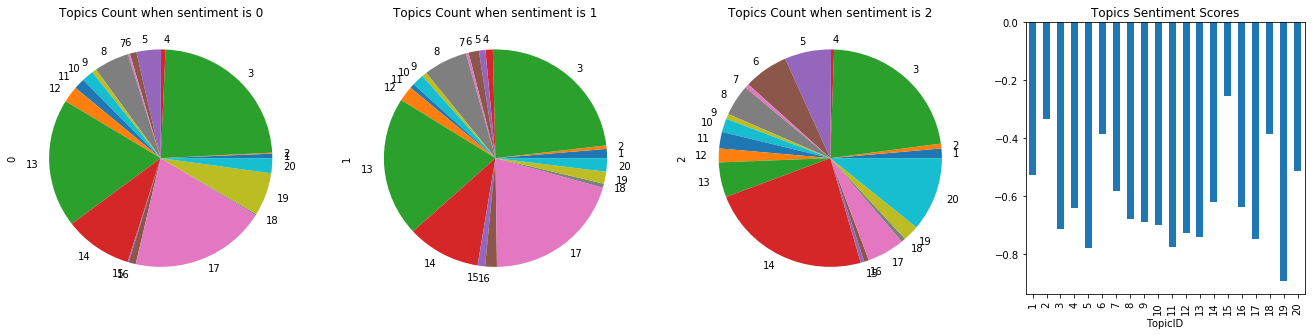

In [76]:
multi_subplot(w=23,h=5,d='pie',dfs=df_topic_sent_news)

# Data Reduction & Relative Value

In [90]:
df_topic_sent.iloc[200:203] # Flat table

TopicID  timeSpan           startTime       0      1      2   total  \
200        7        10  2020-0321 12:00:00  1851.0  430.0  144.0  2425.0   
201       19        10  2020-0321 12:00:00  3109.0  232.0   61.0  3402.0   
202       20        10  2020-0321 12:00:00  1657.0  520.0  499.0  2676.0   

     TopicScore  
200   -0.703918  
201   -0.895944  
202   -0.432735

In [89]:
pd.DataFrame(dict(df_topic_sent.groupby('TopicID').apply(lambda x: list(pd.concat([x[0],x[1],x[2]],axis=1).values))),index=timespan)

1                     2   \
2020-0319 00:00:00           [0.0, 0.0, 0.0]       [0.0, 0.0, 0.0]   
2020-0319 06:00:00           [0.0, 0.0, 0.0]       [0.0, 0.0, 0.0]   
2020-0319 12:00:00           [0.0, 0.0, 0.0]       [0.0, 0.0, 0.0]   
2020-0319 18:00:00     [733.0, 308.0, 153.0]   [116.0, 63.0, 98.0]   
2020-0320 00:00:00      [460.0, 167.0, 83.0]     [33.0, 19.0, 9.0]   
2020-0320 06:00:00    [2369.0, 849.0, 361.0]  [163.0, 173.0, 35.0]   
2020-0320 12:00:00    [2436.0, 903.0, 436.0]  [210.0, 164.0, 29.0]   
2020-0320 18:00:00    [1255.0, 570.0, 245.0]  [176.0, 128.0, 34.0]   
2020-0321 00:00:00    [1689.0, 628.0, 256.0]   [147.0, 62.0, 13.0]   
2020-0321 06:00:00   [2957.0, 1083.0, 462.0]  [143.0, 107.0, 20.0]   
2020-0321 12:00:00   [3211.0, 1172.0, 449.0]   [158.0, 91.0, 30.0]   
2020-0321 18:00:00    [1530.0, 805.0, 242.0]   [144.0, 94.0, 20.0]   
2020-0322 00:00:00    [3230.0, 860.0, 551.0]   [136.0, 62.0, 16.0]   
2020-0322 06:00:00  [4943.0, 1634.0, 1038.0]  [320.0, 133.0, 52.0]   
2020-0322 12:00:00  [7401.0, 2083.0, 1535.0]  [433.0, 145.0, 69.0]   
2020-0322 18:00:00    [1540.0, 528.0, 354.0]   [174.0, 99.0, 31.0]   
2020-0323 00:00:00    [2541.0, 767.0, 440.0]   [213.0, 80.0, 18.0]   
2020-0323 06:00:00   [3182.0, 1142.0, 564.0]  [259.0, 111.0, 36.0]   
2020-0323 12:00:00   [4997.0, 1379.0, 752.0]  [288.0, 141.0, 29.0]   
2020-0323 18:00:00    [1659.0, 577.0, 353.0]  [202.0, 107.0, 30.0]   
2020-0324 00:00:00    [2415.0, 701.0, 349.0]   [200.0, 72.0, 45.0]   
2020-0324 06:00:00   [3314.0, 1138.0, 531.0]  [280.0, 140.0, 29.0]   
2020-0324 12:00:00   [5016.0, 1716.0, 800.0]  [271.0, 133.0, 33.0]   
2020-0324 18:00:00    [1529.0, 637.0, 253.0]   [182.0, 82.0, 23.0]   
2020-0325 00:00:00    [1677.0, 632.0, 364.0]   [123.0, 64.0, 14.0]   
2020-0325 06:00:00   [2696.0, 1022.0, 540.0]  [289.0, 125.0, 30.0]   
2020-0325 12:00:00   [2550.0, 1162.0, 496.0]  [340.0, 171.0, 38.0]   
2020-0325 18:00:00    [1033.0, 485.0, 225.0]  [268.0, 108.0, 30.0]   
2020-0326 00:00:00    [1487.0, 611.0, 263.0]   [388.0, 56.0, 18.0]   
2020-0326 06:00:00      [498.0, 162.0, 83.0]    [154.0, 17.0, 6.0]   
2020-0326 12:00:00           [0.0, 0.0, 0.0]       [0.0, 0.0, 0.0]   
2020-0326 18:00:00           [0.0, 0.0, 0.0]       [0.0, 0.0, 0.0]   
2020-0327 00:00:00           [0.0, 0.0, 0.0]       [0.0, 0.0, 0.0]   
2020-0327 06:00:00   [2307.0, 1078.0, 396.0]  [198.0, 151.0, 35.0]   
2020-0327 12:00:00   [2323.0, 1159.0, 417.0]  [327.0, 169.0, 43.0]   
2020-0327 18:00:00    [1104.0, 524.0, 233.0]  [202.0, 113.0, 28.0]   
2020-0328 00:00:00    [1491.0, 528.0, 237.0]   [152.0, 76.0, 91.0]   
2020-0328 06:00:00    [2244.0, 841.0, 353.0]   [191.0, 79.0, 30.0]   
2020-0328 12:00:00   [3531.0, 1558.0, 773.0]   [191.0, 95.0, 34.0]   
2020-0328 18:00:00    [1274.0, 609.0, 275.0]   [131.0, 68.0, 22.0]   
2020-0329 00:00:00    [1917.0, 784.0, 325.0]  [119.0, 91.0, 100.0]   
2020-0329 06:00:00    [1839.0, 693.0, 320.0]   [161.0, 80.0, 21.0]   
2020-0329 12:00:00           [0.0, 0.0, 0.0]       [0.0, 0.0, 0.0]   
2020-0329 18:00:00           [0.0, 0.0, 0.0]       [0.0, 0.0, 0.0]   

                                        3                      4   \
2020-0319 00:00:00         [0.0, 0.0, 0.0]        [0.0, 0.0, 0.0]   
2020-0319 06:00:00         [0.0, 0.0, 0.0]        [0.0, 0.0, 0.0]   
2020-0319 12:00:00         [0.0, 0.0, 0.0]        [0.0, 0.0, 0.0]   
2020-0319 18:00:00    [902.0, 184.0, 80.0]  [1325.0, 294.0, 37.0]   
2020-0320 00:00:00      [166.0, 32.0, 9.0]    [270.0, 67.0, 10.0]   
2020-0320 06:00:00   [1107.0, 217.0, 67.0]  [1183.0, 291.0, 41.0]   
2020-0320 12:00:00  [1357.0, 269.0, 105.0]  [1502.0, 375.0, 40.0]   
2020-0320 18:00:00  [1105.0, 208.0, 104.0]  [1371.0, 299.0, 51.0]   
2020-0321 00:00:00    [698.0, 145.0, 49.0]  [1120.0, 238.0, 41.0]   
2020-0321 06:00:00    [815.0, 182.0, 68.0]  [1018.0, 258.0, 43.0]   
2020-0321 12:00:00    [975.0, 212.0, 77.0]  [1314.0, 319.0, 54.0]   
2020-0321 18:00:00    [761.0, 159.0, 66.0]  [1289.0, 282.0, 41.

In [94]:
#每天的每个sentiment 的所有topic 之和
df_topic_sent.groupby('startTime').sum().loc[:,[0,1,2]]

0       1       2
startTime                                  
2020-0319 00:00:00      0.0     0.0     0.0
2020-0319 06:00:00      0.0     0.0     0.0
2020-0319 12:00:00      0.0     0.0     0.0
2020-0319 18:00:00  34107.0  5173.0  2793.0
2020-0320 00:00:00   8259.0  1337.0   624.0
2020-0320 06:00:00  37070.0  6268.0  2818.0
2020-0320 12:00:00  46078.0  7546.0  3623.0
2020-0320 18:00:00  44810.0  6978.0  3936.0
2020-0321 00:00:00  34437.0  5131.0  2850.0
2020-0321 06:00:00  33774.0  5827.0  2775.0
2020-0321 12:00:00  42153.0  7191.0  3435.0
2020-0321 18:00:00  38318.0  6204.0  3157.0
2020-0322 00:00:00  33579.0  5003.0  2907.0
2020-0322 06:00:00  40255.0  6987.0  3846.0
2020-0322 12:00:00  45361.0  7824.0  5112.0
2020-0322 18:00:00  40039.0  6130.0  3560.0
2020-0323 00:00:00  35291.0  5288.0  2865.0
2020-0323 06:00:00  38081.0  6413.0  2982.0
2020-0323 12:00:00  52232.0  8354.0  4217.0
2020-0323 18:00:00  42073.0  6867.0  3800.0
2020-0324 00:00:00  34246.0  4912.0  2819.0
2020-0324 06:00:00  38479.0  6914.0  3092.0
2020-0324 12:00:00  53107.0  9274.0  4329.0
2020-0324 18:00:00  38278.0  6184.0  3277.0
2020-0325 00:00:00  28061.0  4613.0  2508.0
2020-0325 06:00:00  36803.0  6840.0  3497.0
2020-0325 12:00:00  45027.0  8493.0  4247.0
2020-0325 18:00:00  35295.0  5972.0  3010.0
2020-0326 00:00:00  26789.0  4469.0  2281.0
2020-0326 06:00:00   5503.0   958.0   462.0
2020-0326 12:00:00      0.0     0.0     0.0
2020-0326 18:00:00      0.0     0.0     0.0
2020-0327 00:00:00      0.0     0.0     0.0
2020-0327 06:00:00  35011.0  6735.0  2969.0
2020-0327 12:00:00  44608.0  8498.0  3850.0
2020-0327 18:00:00  35017.0  5984.0  3086.0
2020-0328 00:00:00  27481.0  4538.0  2322.0
2020-0328 06:00:00  30592.0  5601.0  2571.0
2020-0328 12:00:00  39172.0  7183.0  3609.0
2020-0328 18:00:00  31670.0  5425.0  2865.0
2020-0329 00:00:00  27536.0  4693.0  2589.0
2020-0329 06:00:00  21590.0  3904.0  1931.0
2020-0329 12:00:00      0.0     0.0     0.0
2020-0329 18:00:00      0.0     0.0     0.0

In [96]:
#每天的每个topic 的三种sentiment之和
pd.DataFrame(dict(df_topic_sent.groupby('TopicID').apply(lambda x: list(x['total']))),index=timespan)

1      2       3       4        5       6       7   \
2020-0319 00:00:00      0.0    0.0     0.0     0.0      0.0     0.0     0.0   
2020-0319 06:00:00      0.0    0.0     0.0     0.0      0.0     0.0     0.0   
2020-0319 12:00:00      0.0    0.0     0.0     0.0      0.0     0.0     0.0   
2020-0319 18:00:00   1194.0  277.0  1166.0  1656.0  18195.0   775.0  2497.0   
2020-0320 00:00:00    710.0   61.0   207.0   347.0   3776.0   134.0   585.0   
2020-0320 06:00:00   3579.0  371.0  1391.0  1515.0  13827.0   754.0  2264.0   
2020-0320 12:00:00   3775.0  403.0  1731.0  1917.0  19100.0   934.0  2784.0   
2020-0320 18:00:00   2070.0  338.0  1417.0  1721.0  23725.0  1023.0  3244.0   
2020-0321 00:00:00   2573.0  222.0   892.0  1399.0  16829.0   653.0  2281.0   
2020-0321 06:00:00   4502.0  270.0  1065.0  1319.0  11436.0   717.0  1887.0   
2020-0321 12:00:00   4832.0  279.0  1264.0  1687.0  16159.0   904.0  2425.0   
2020-0321 18:00:00   2577.0  258.0   986.0  1612.0  19095.0   867.0  2653.0   
2020-0322 00:00:00   4641.0  214.0   752.0  1256.0  14552.0   647.0  1896.0   
2020-0322 06:00:00   7615.0  505.0   973.0  1341.0  12244.0   754.0  2037.0   
2020-0322 12:00:00  11019.0  647.0  1039.0  1440.0  15116.0   805.0  2277.0   
2020-0322 18:00:00   2422.0  304.0  1023.0  1460.0  19675.0   861.0  2746.0   
2020-0323 00:00:00   3748.0  311.0   827.0  1463.0  15587.0   679.0  2067.0   
2020-0323 06:00:00   4888.0  406.0  1189.0  1449.0  11944.0   681.0  2037.0   
2020-0323 12:00:00   7128.0  458.0  1636.0  1751.0  18758.0  1023.0  2849.0   
2020-0323 18:00:00   2589.0  339.0  1264.0  1436.0  20192.0  1028.0  3014.0   
2020-0324 00:00:00   3465.0  317.0   846.0  1197.0  14453.0   693.0  1874.0   
2020-0324 06:00:00   4983.0  449.0  1288.0  2002.0  11790.0   716.0  2038.0   
2020-0324 12:00:00   7532.0  437.0  1745.0  2733.0  17713.0  1029.0  2864.0   
2020-0324 18:00:00   2419.0  287.0  1158.0  1581.0  17762.0   822.0  2588.0   
2020-0325 00:00:00   2673.0  201.0   654.0  1219.0  12804.0   560.0  1632.0   
2020-0325 06:00:00   4258.0  444.0  1199.0  1715.0  11796.0   808.0  2142.0   
2020-0325 12:00:00   4208.0  549.0  1554.0  1962.0  16354.0  1025.0  2829.0   
2020-0325 18:00:00   1743.0  406.0  1147.0  1431.0  16475.0   856.0  2651.0   
2020-0326 00:00:00   2361.0  462.0   640.0  1296.0  11795.0   538.0  1606.0   
2020-0326 06:00:00    743.0  177.0   165.0   271.0   1753.0   106.0   282.0   
2020-0326 12:00:00      0.0    0.0     0.0     0.0      0.0     0.0     0.0   
2020-0326 18:00:00      0.0    0.0     0.0     0.0      0.0     0.0     0.0   
2020-0327 00:00:00      0.0    0.0     0.0     0.0      0.0     0.0     0.0   
2020-0327 06:00:00   3781.0  384.0  1163.0  2141.0  11173.0   656.0  2104.0   
2020-0327 12:00:00   3899.0  539.0  1417.0  2359.0  16251.0   872.0  2594.0   
2020-0327 18:00:00   1861.0  343.0   892.0  1600.0  16108.0   778.0  2465.0   
2020-0328 00:00:00   2256.0  319.0   635.0  1400.0  11896.0   583.0  1630.0   
2020-0328 06:00:00   3438.0  300.0   841.0  1453.0   9176.0   632.0  1672.0   
2020-0328 12:00:00   5862.0  320.0  1000.0  1730.0  12806.0   765.0  2030.0   
2020-0328 18:00:00   2158.0  221.0   731.0  1386.0  14242.0   709.0  2155.0   
2020-0329 00:00:00   3026.0  310.0   570.0  1225.0  11454.0   613.0  1526.0   
2020-0329 06:00:00   2852.0  262.0   558.0  1030.0   6554.0   404.0  1122.0   
2020-0329 12:00:00      0.0    0.0     0.0     0.0      0.0     0.0     0.0   
2020-0329 18:00:00      0.0    0.0     0.0     0.0      0.0     0.0     0.0   

                        8       9       10      11     12      13      14  \
2020-0319 00:00:00     0.0     0.0     0.0     0.0    0.0     0.0     0.0   
2020-0319 06:00:00     0.0     0.0     0.0     0.0    0.0     0.0     0.0   
2020-0319 12:00:00     0.0     0.0     0.0     0.0    0.0     0.0     0.0   
2020-0319 18:00:00   738.0  1998.0  1078.0  2961.0  436.0   859.0  1388.0   
2020-0320 00:00:00   192.0   414.0   832.0   778.0   75.0   207.0   199.0   
2020-03

In [97]:
# 每个topic的每种sentiment一周之和
df_topic_sent.groupby('TopicID').sum().loc[:,[0,1,2]].T

TopicID       1       2        3        4         5        6        7   \
0        86378.0  7482.0  28542.0  42231.0  438622.0  14920.0  57952.0   
1        31495.0  3669.0   6363.0  10627.0   37325.0   6391.0  14996.0   
2        15507.0  1239.0   2120.0   1642.0   36618.0   5093.0   4399.0   

TopicID       8        9         10        11      12       13       14  \
0        22170.0  67842.0  115059.0  130710.0  8563.0  27028.0  29441.0   
1         7280.0  12244.0   14797.0   12764.0  2222.0   8247.0   5504.0   
2         1257.0   2333.0    7369.0    7839.0   481.0    558.0   2990.0   

TopicID       15       16       17      18       19       20  
0        11062.0  14518.0  30934.0  2902.0  94586.0  49240.0  
1         7430.0   4520.0   6832.0  2100.0   7660.0  13245.0  
2         2492.0    576.0    621.0   445.0   2086.0  14949.0

In [115]:
def getRatio(df_topic_sent):
    sent_day,sent_topic = {},{}
    for sent in range(3):
        sent_day[sent] = pd.DataFrame(dict(df_topic_sent.groupby('TopicID').apply(lambda x: list(x[sent]))),index=range(44)).T
        for d in range(44):
            sent_day[sent][d] = sent_day[sent][d]/df_topic_sent.groupby('startTime').sum().loc[:,[0,1,2]][sent][d] 
                                                #在当天所有相同sentiment 下的和（aggregate topic）
        sent_topic[sent] = pd.DataFrame(dict(df_topic_sent.groupby('TopicID').apply(lambda x: list(x[sent]))),index=range(44))
        for t in range(1,21):
            sent_topic[sent][t] = sent_topic[sent][t]/df_topic_sent.groupby('TopicID').sum().loc[:,sent][t] 
                                        #在一周所有相同sentiment下的和(aggregate day)
    return sent_day,sent_topic

In [116]:
def ratioSent(df_topic_sent):
    sent_day,sent_topic = getRatio(df_topic_sent)
    plt.figure(figsize=(22, 14))
    for sent in range(3):
        plt.subplot(f'23{sent+1}')
        plt.plot(sent_day[sent].T)
#         plt.ylim(0,0.32)
        plt.legend(range(1,21),loc='best')
        plt.title(f'Trends of Sentiment {sent} (daily ratio in the same day)') # 每个日期上的点和为1
        plt.subplot(f'23{sent+4}')
        plt.plot(sent_topic[sent])
#         plt.ylim(0,0.36)
        plt.legend(range(1,21),loc='best')
        plt.title(f'Trends of Sentiment {sent} (daily ratio in the same topic)')#每条topic线条和为1

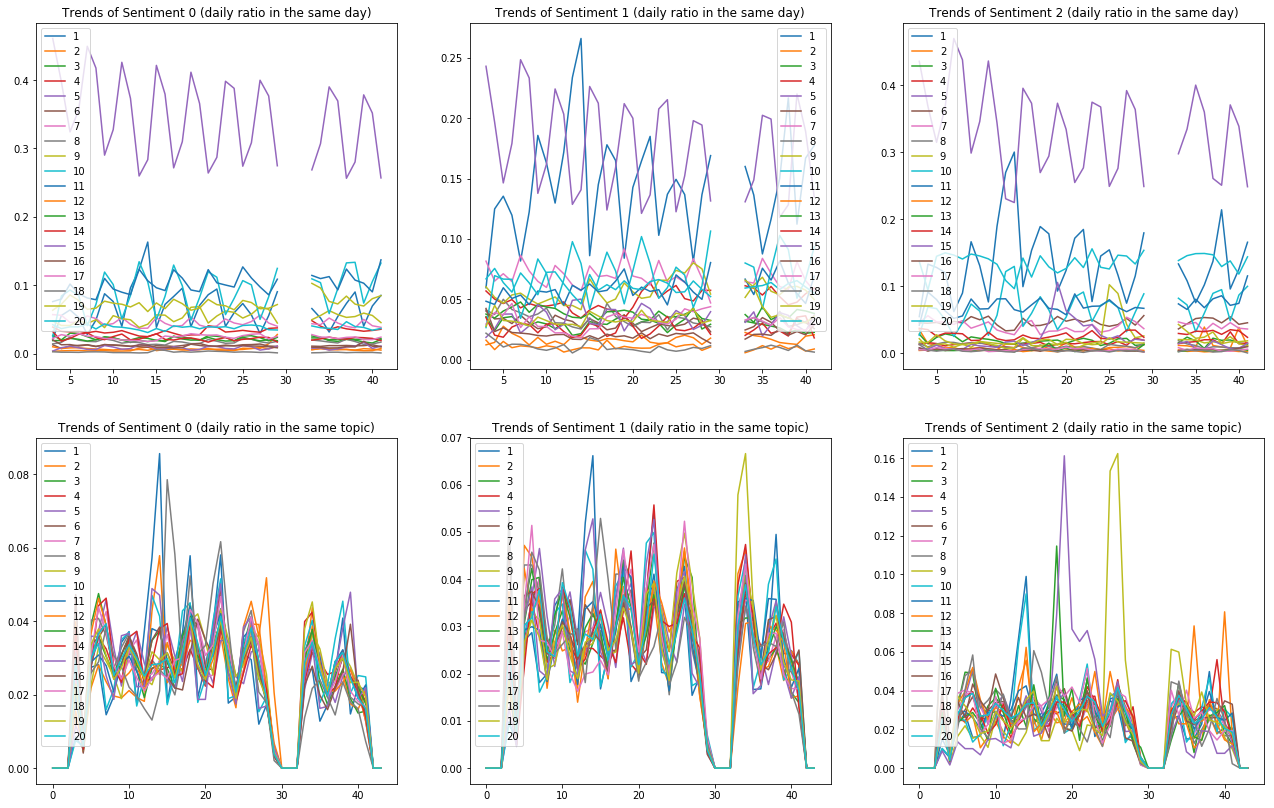

In [117]:
ratioSent(df_topic_sent)

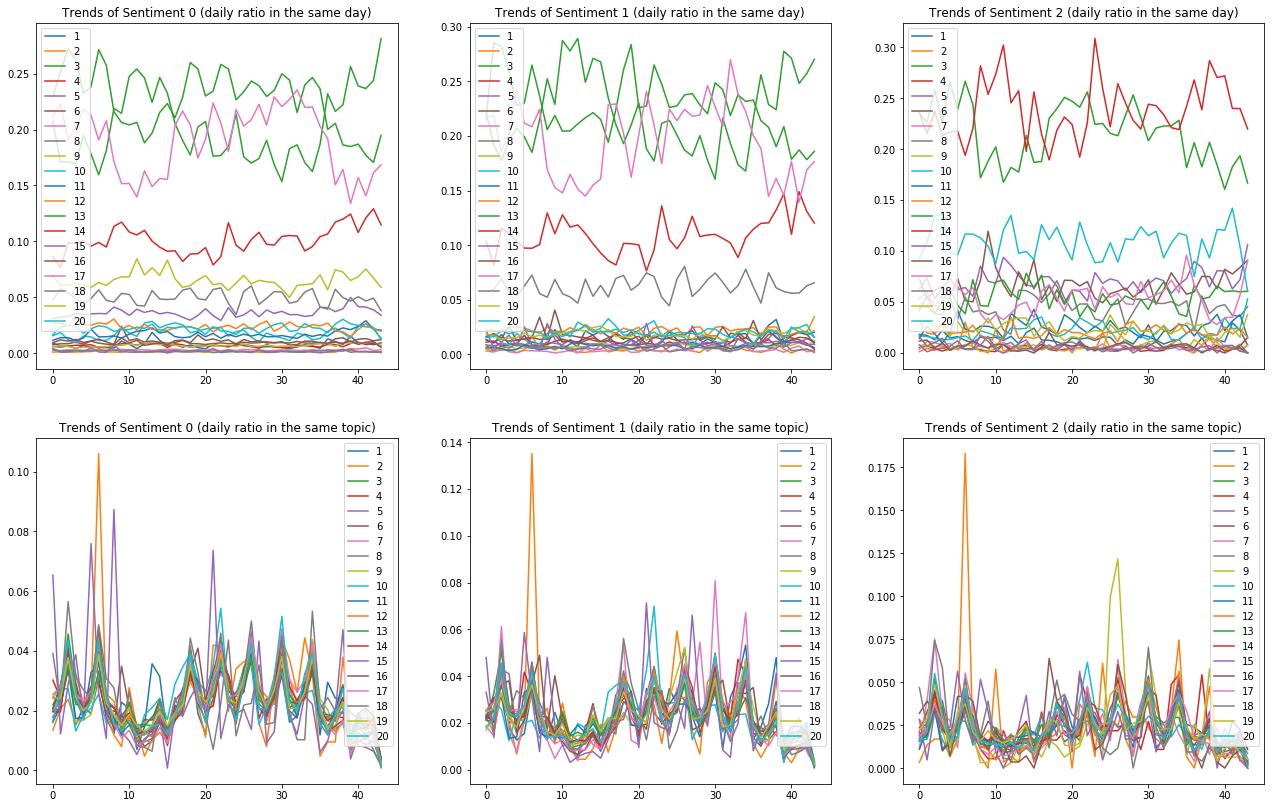

In [118]:
ratioSent(df_topic_sent_news)

In [119]:
def multi_subplot_sentRatio(w=25,h=25,dfs=df_topic_sent,ratio=0,maxy='0.38'):
    plt.figure(1,figsize=(w, h))
    t=1
    for i in range(5):
        for j in range(4):
            plt.subplot2grid((5,4), (i,j))
            for sent in range(3):
                if ratio==0:
                    getRatio(dfs)[ratio][sent].loc[t,:].plot(ylim=(0,maxy))
                else:
                    getRatio(dfs)[ratio][sent].T.loc[t,:].plot(ylim=(0,maxy))
                    plt.xticks(range(44),range(44),rotation=0)
            plt.legend(['Neg','Neu','Pos'],loc='best')
            plt.title('Sentiment Ratio of Topic '+ str(t))
            t += 1

In [133]:
def topicDailySent(dfs=df_topic_sent):
    plt.figure(figsize=(25, 7))
    for i in range(3):
        sents = dict(dfs.groupby('TopicID').apply(lambda x: list(x[i])))
        count = pd.DataFrame(sents)
        plt.subplot(f'14{i+1}')
        plt.plot(count)
        plt.xticks(range(44),range(44),rotation=0)
        plt.legend(range(1,21),loc='best')
        plt.title(f'Sentiment {i} Count against date of each topcis')
    plt.subplot('144')
    plt.plot(pd.DataFrame(dict(dfs.groupby('TopicID').apply(lambda x: list(x['TopicScore'])))))
#     plt.ylim(-0.85,-0.2)
    plt.xticks(range(44),range(44),rotation=0)
    plt.legend(range(1,21),loc='best')
    plt.title('Sentiment Score against date of each topcis')

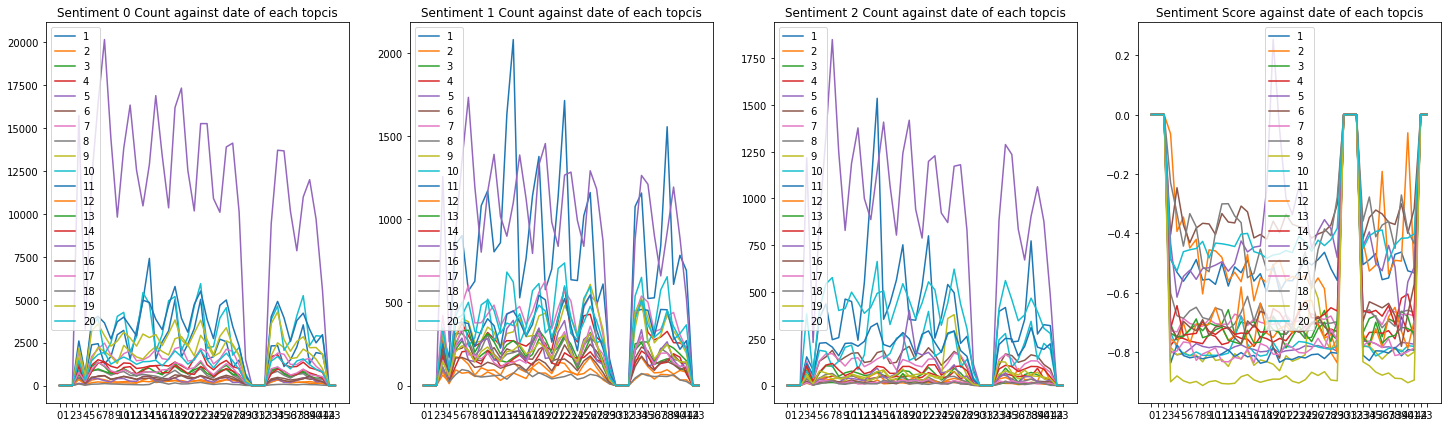

In [134]:
topicDailySent(df_topic_sent)

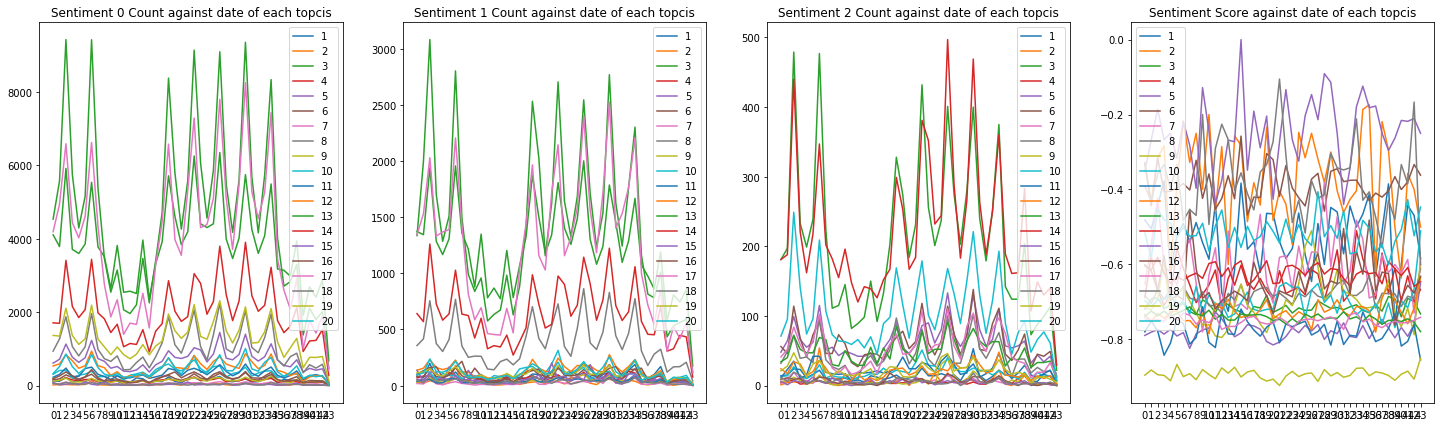

In [135]:
topicDailySent(df_topic_sent_news)

# Sentiment trends against each topic

In [141]:
def multi_subplot_sent(w=15,h=12,dfs=df_topic_sent):
    plt.figure(1,figsize=(w, h))
    t=1
    for i in range(5):
        for j in range(4):
            plt.subplot2grid((5,4), (i,j))
#             plt.subplot(f'54{(t+1)}') #不能超过9个
            for s in range(3):
                pic= pd.Series(dfs.groupby('TopicID').apply(lambda x: list(x[s]))[t]).plot()
#                 pic.set_ylim([0,90000])
            plt.legend(['Neg','Neu','Pos'],loc='best')
            plt.xticks(range(44),range(44),rotation=0)
            plt.title('Sentiment Trend of Topic '+ str(t))
            t += 1

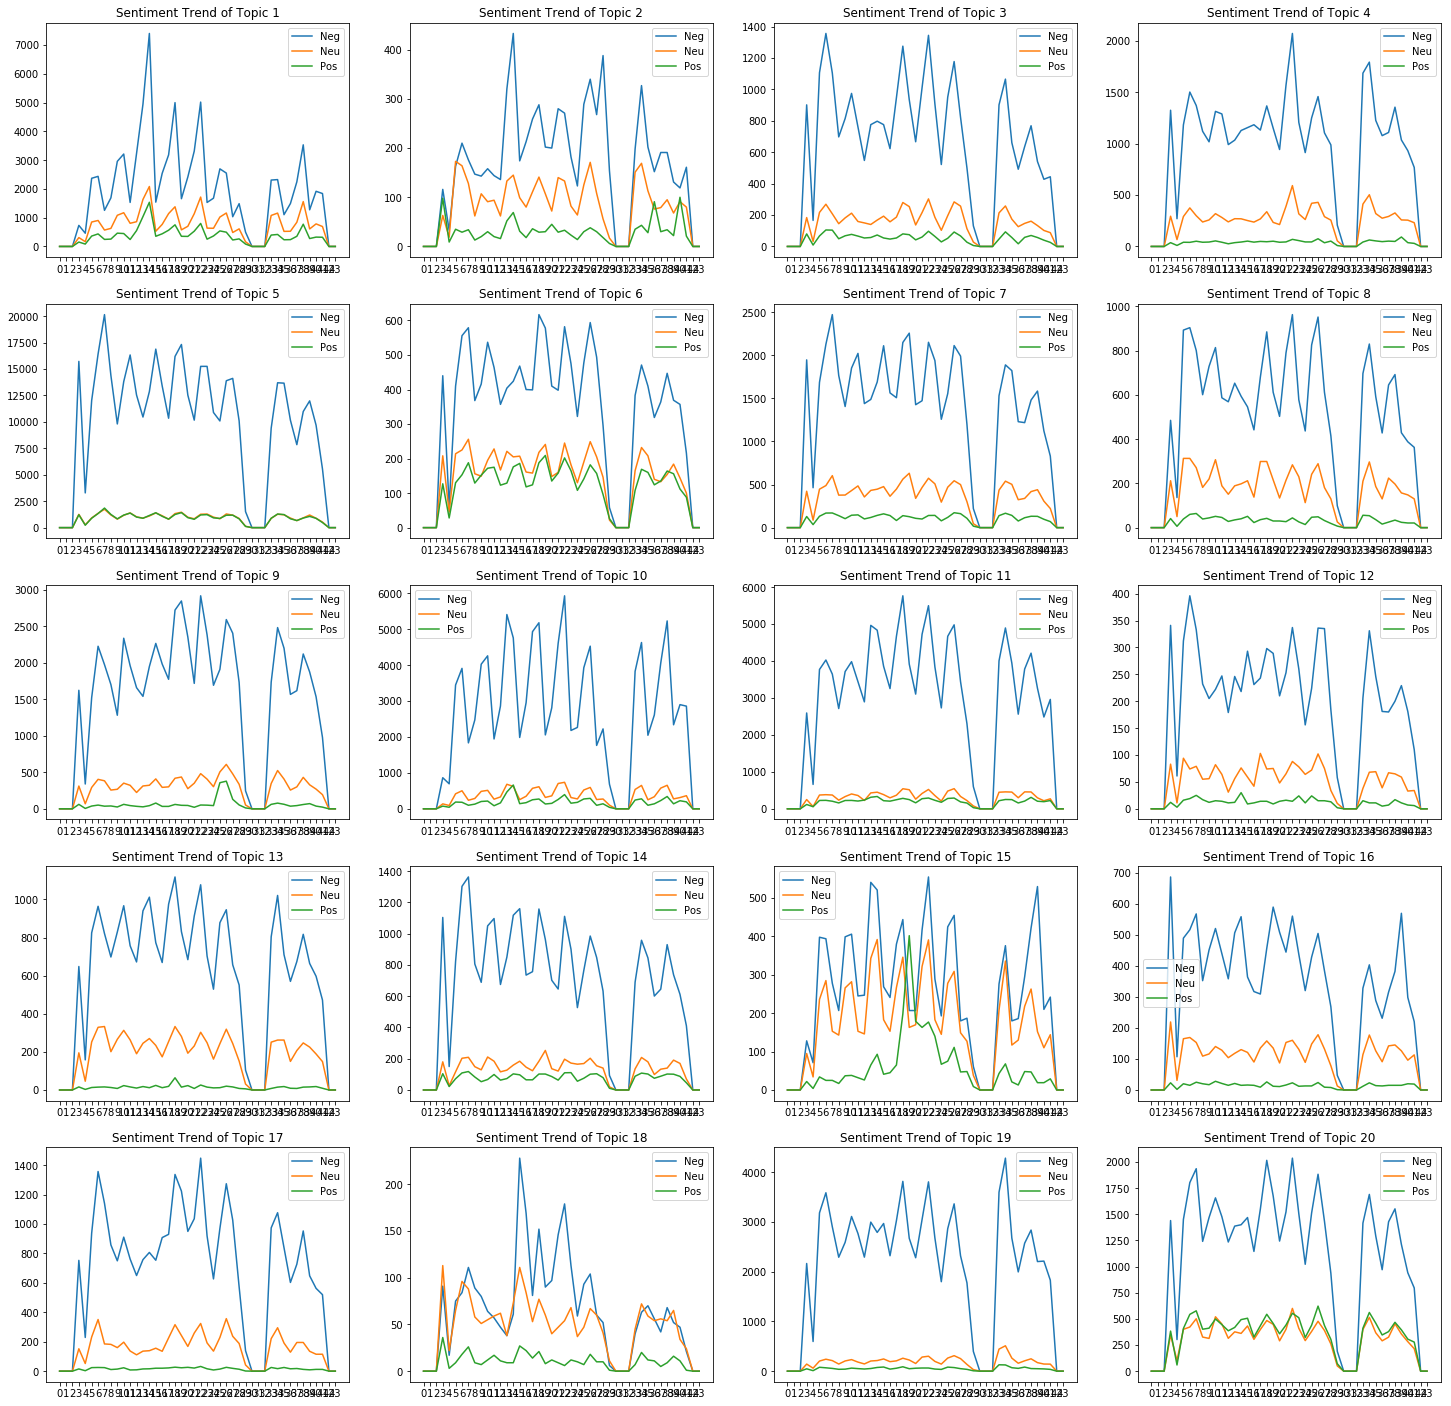

In [142]:
multi_subplot_sent(w=25,h=25,dfs=df_topic_sent)

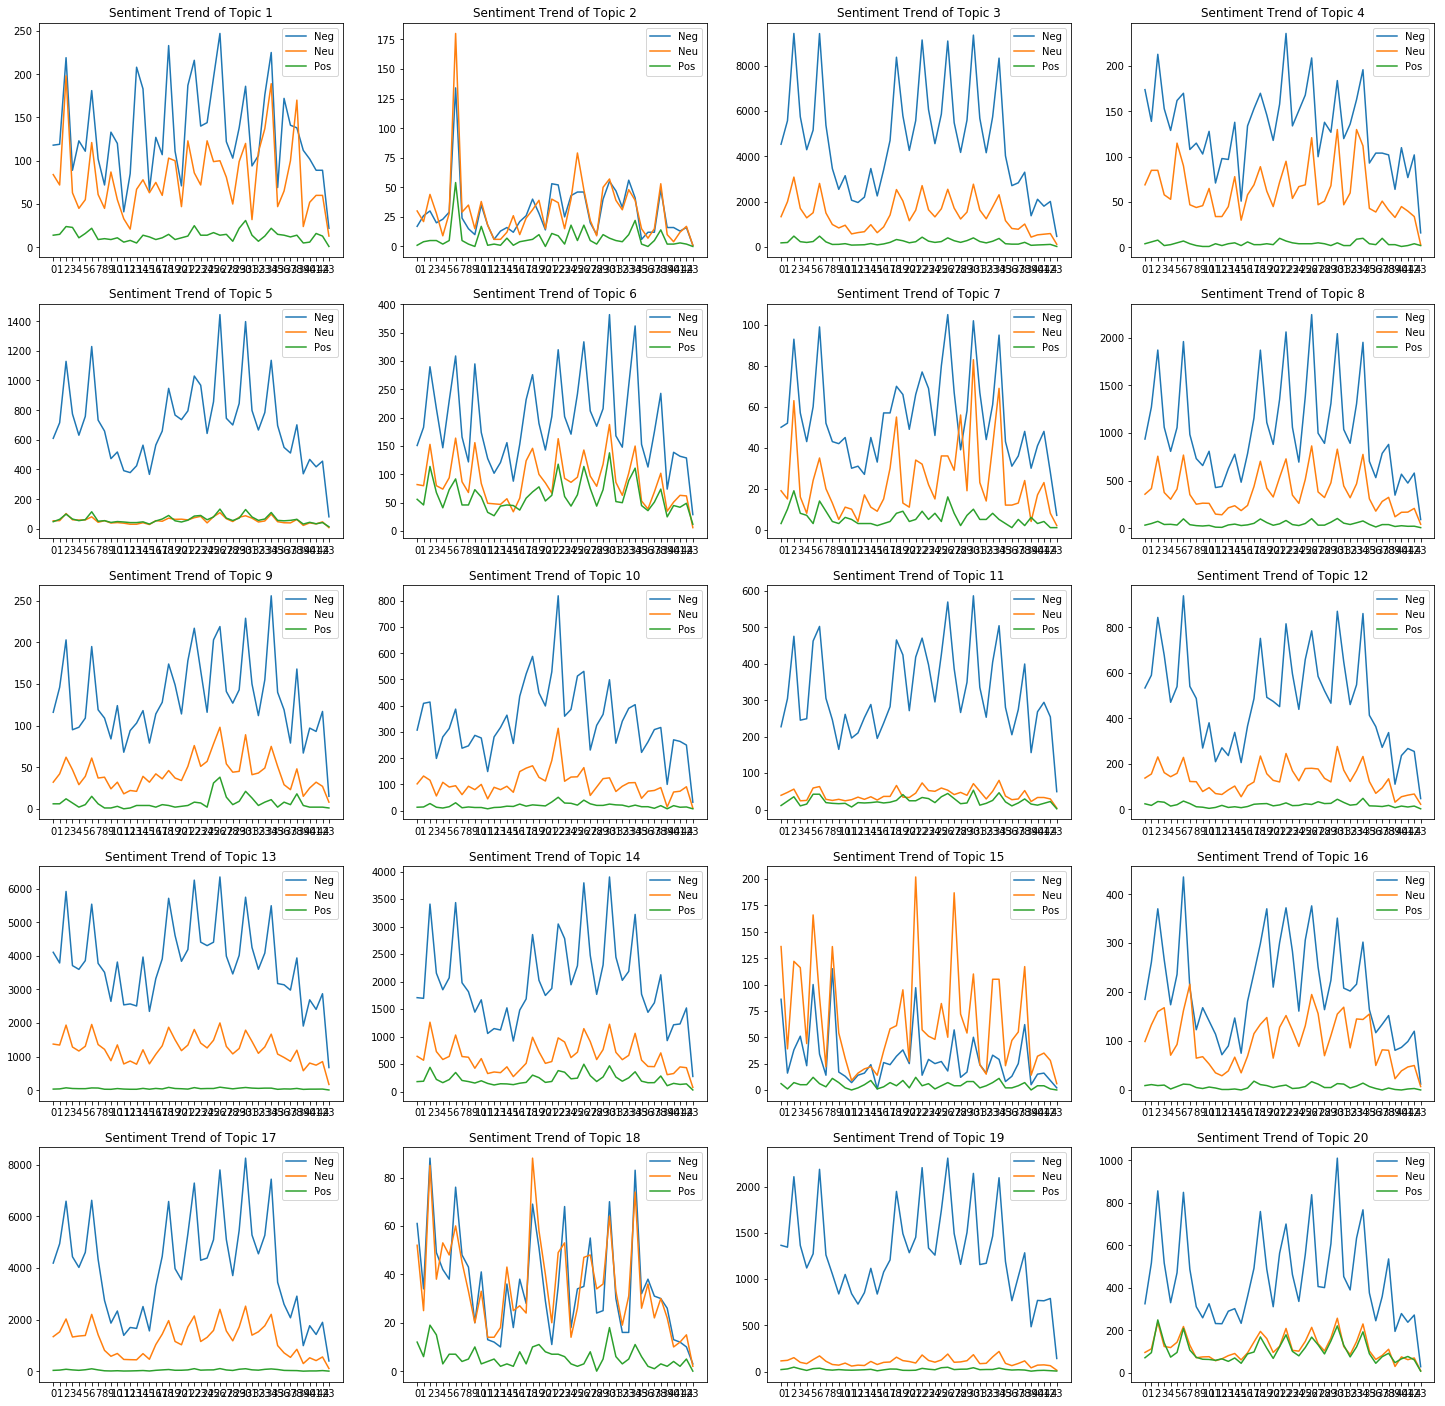

In [143]:
multi_subplot_sent(w=25,h=25,dfs=df_topic_sent_news)

## Relative value: Ratio based on Topics
For each sentiment in each day, all the values of each topics add up to 1

纵坐标上所有点和为1

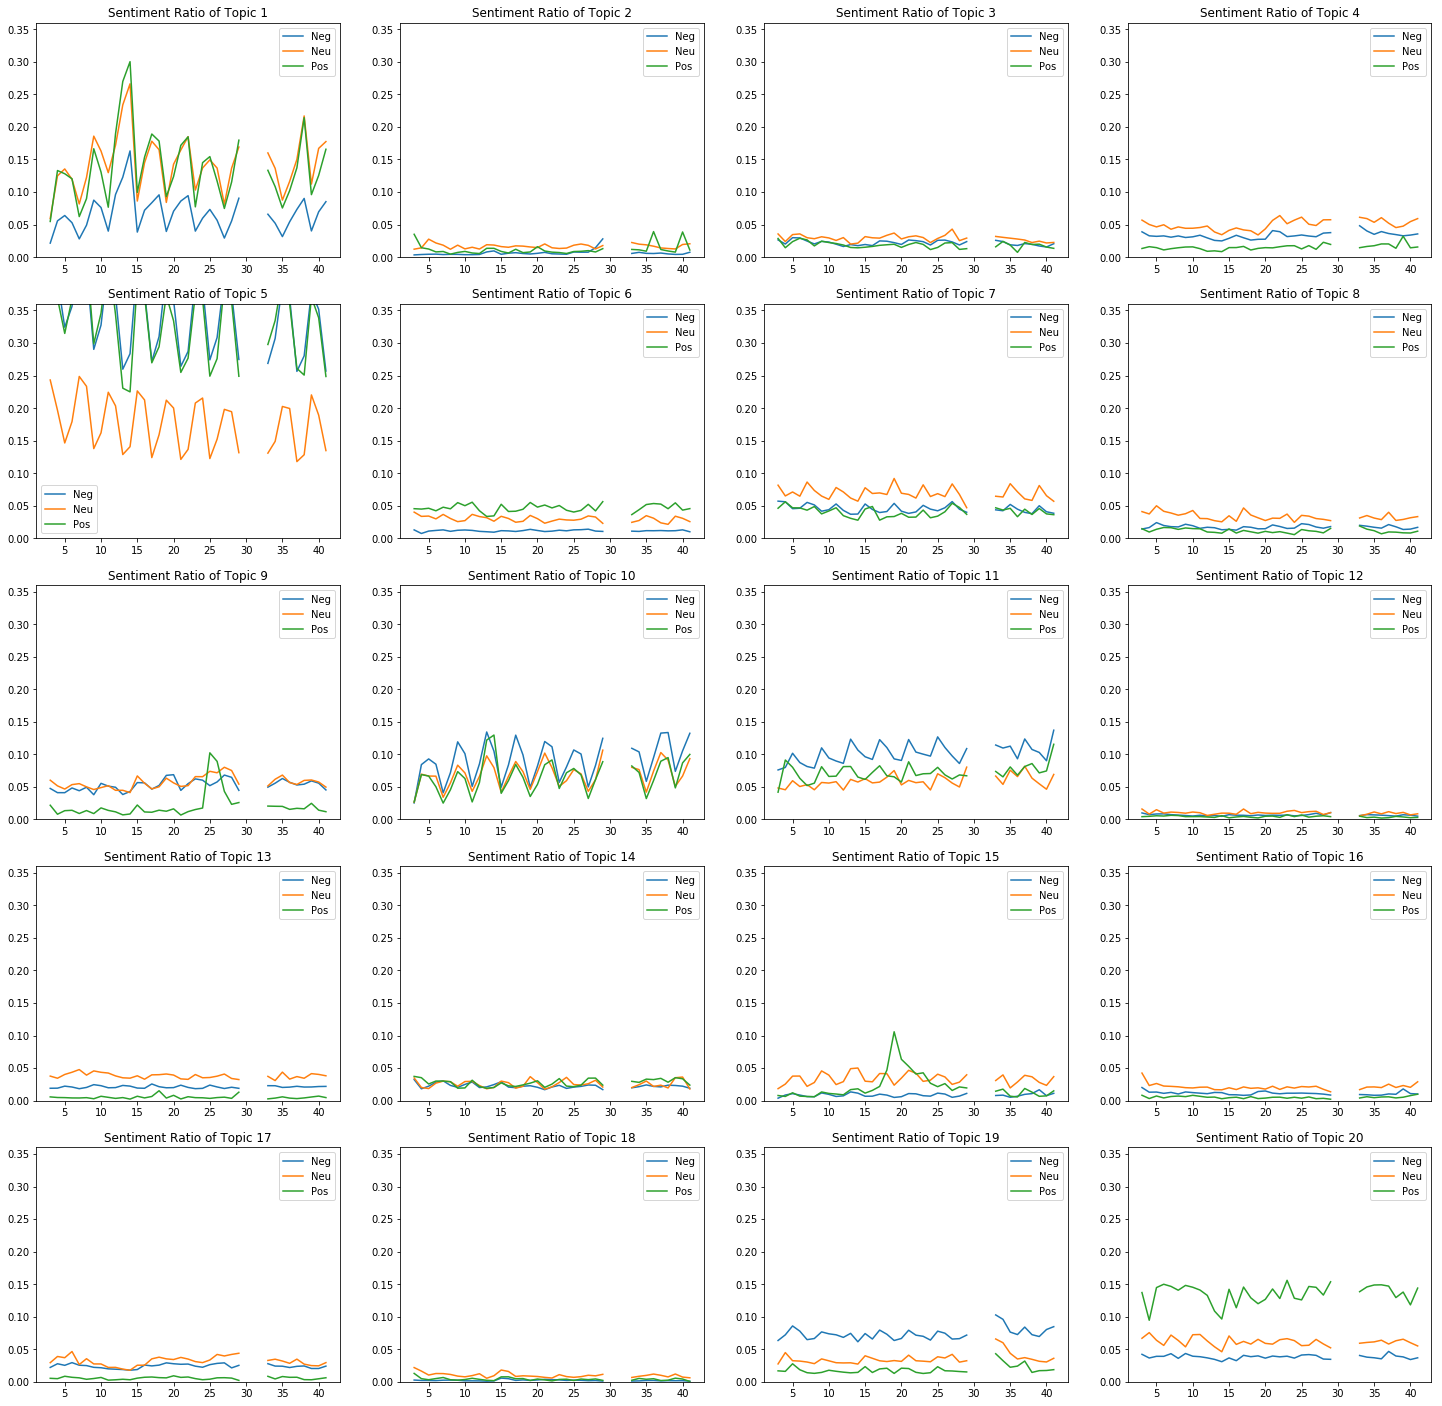

In [139]:
multi_subplot_sentRatio(dfs = df_topic_sent,maxy=0.36)

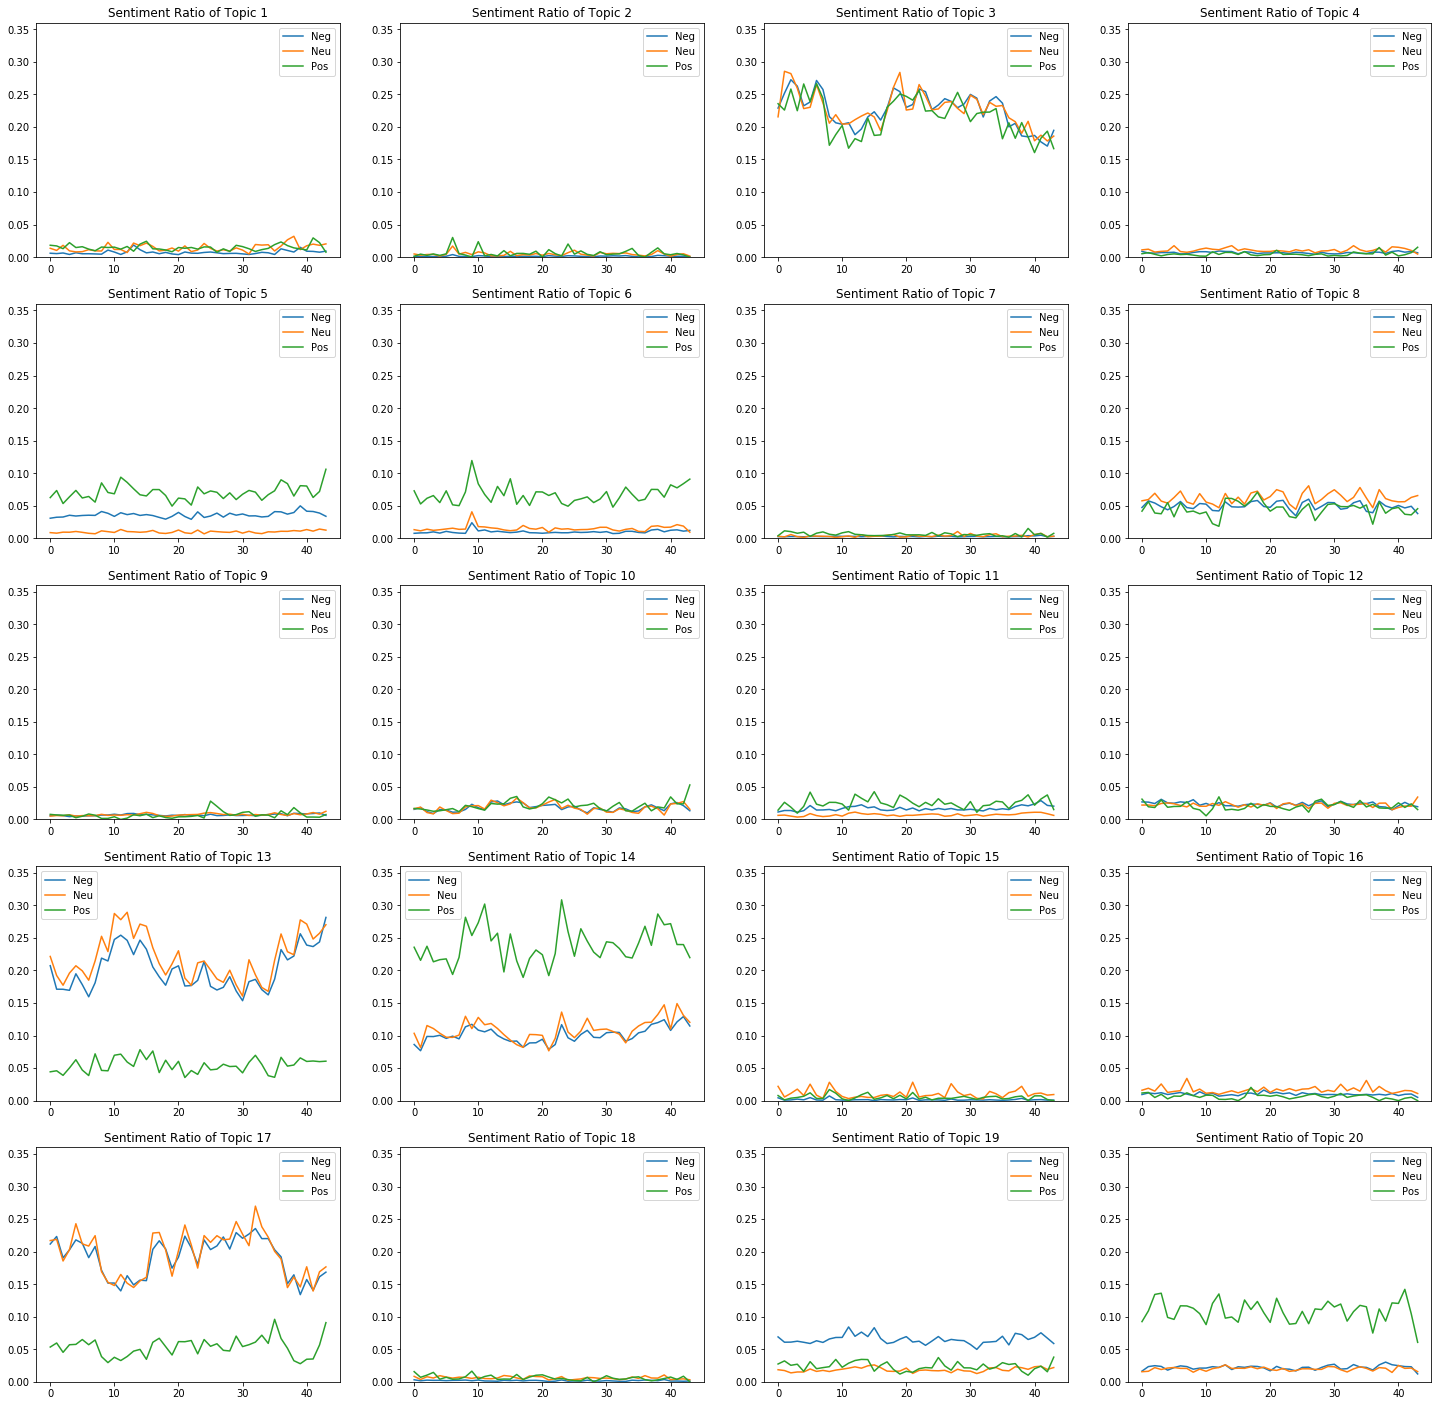

In [144]:
multi_subplot_sentRatio(dfs = df_topic_sent_news, maxy=0.36)

## Relative values: Ratio based on date
For each sentiment in each topic, all the one-week value add up to 1
一条线上所有点和为1

sentiment折线趋近于数量曲线

In [146]:
# multi_subplot_sentRatio(w=25,h=25,dfs=df_topic_sent,ratio=1,maxy=0.12)

In [147]:
# multi_subplot_sentRatio(w=25,h=25,dfs=df_topic_sent_news,ratio=1,maxy=0.35)

## Sentiment Score

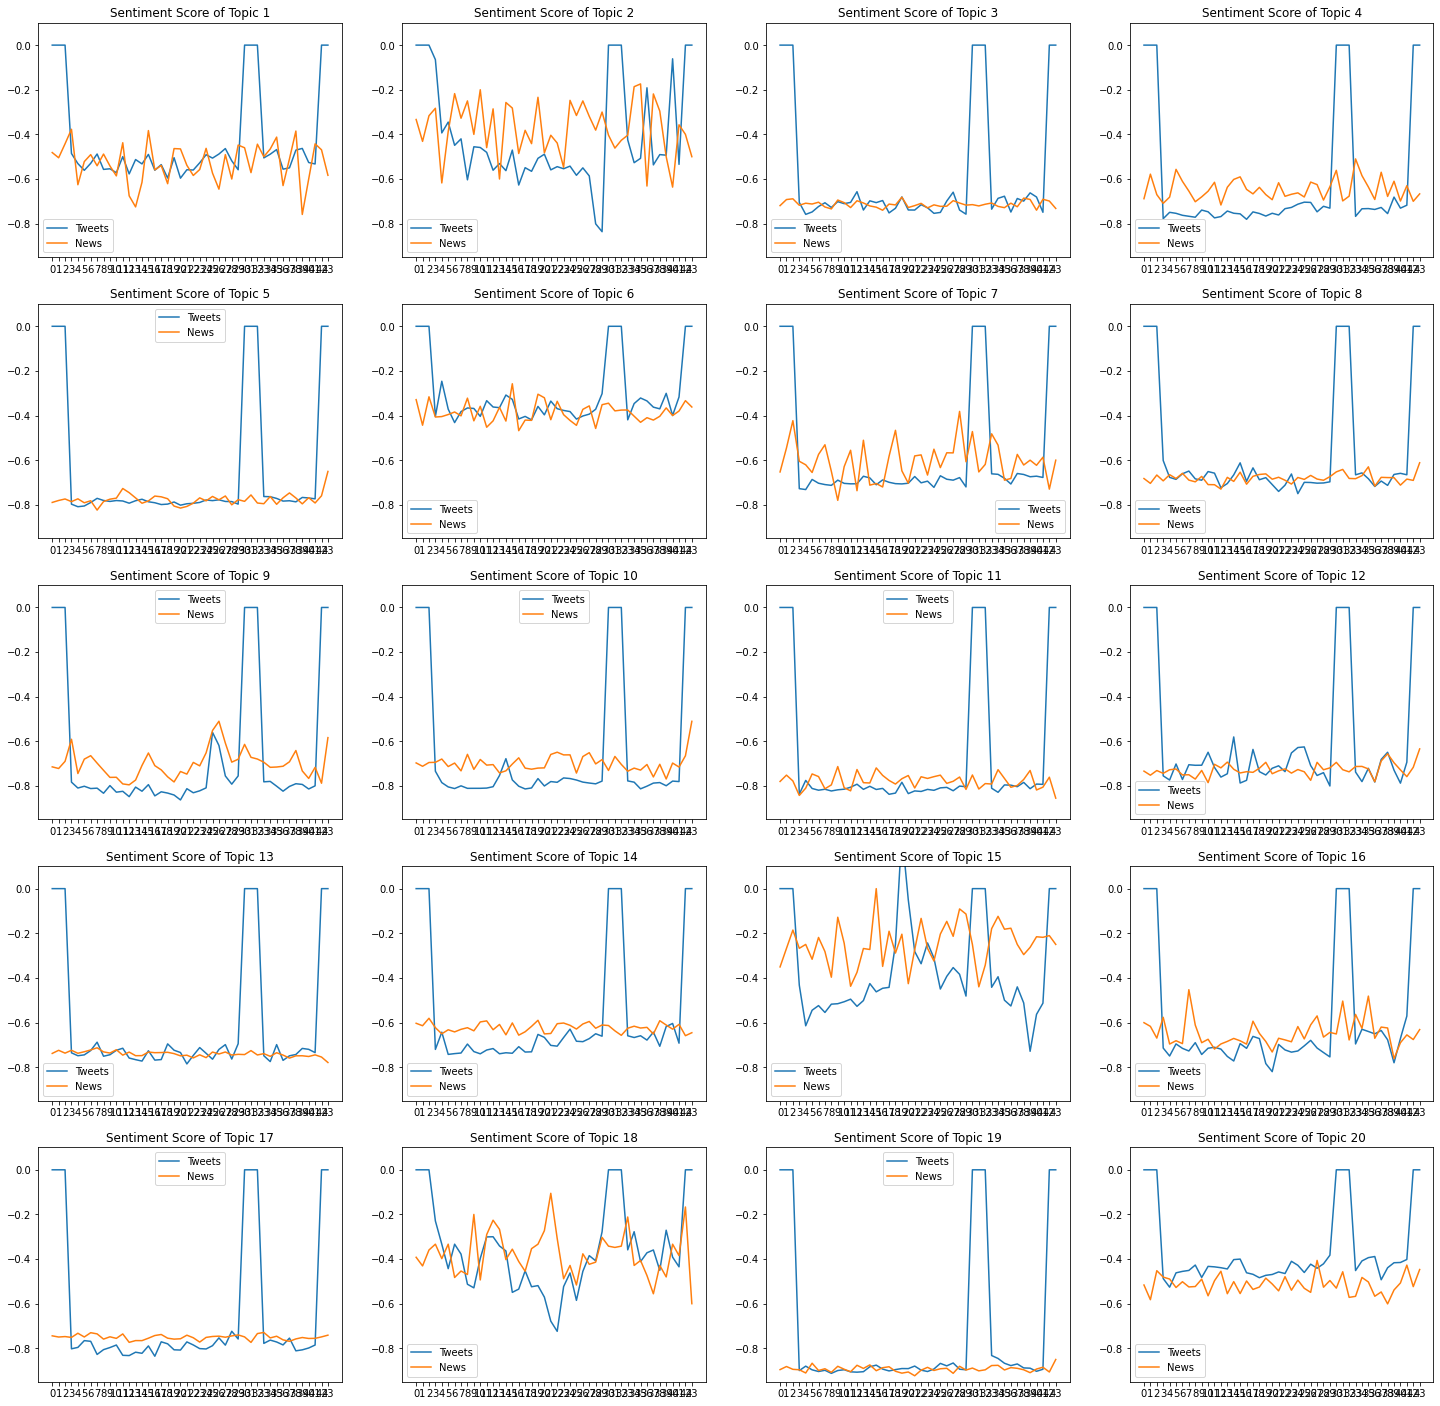

In [5]:
def multi_subplot_sent_score(w=15,h=12):
    plt.figure(1,figsize=(w, h))
    t=1
    for i in range(5):
        for j in range(4):
            plt.subplot2grid((5,4), (i,j))
#             plt.subplot(f'54{(t+1)}') #不能超过9个
            pd.Series(df_topic_sent.groupby('TopicID').apply(lambda x: list(x['TopicScore']))[t]).plot(ylim=(-0.95,0.1))
            pd.Series(df_topic_sent_news.groupby('TopicID').apply(lambda x: list(x['TopicScore']))[t]).plot()
            plt.legend(['Tweets','News'],loc='best')
            plt.xticks(range(44),range(44),rotation=0)
#             pic.set_ylim([-0.85,-0.2]) #若适用plt.plot(xx)则不能适用该属性
            plt.title('Sentiment Score of Topic '+ str(t))
            t += 1
multi_subplot_sent_score(w=25,h=25)

# 10% news & 60% tweets